#Bibliotecas

In [556]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import datasets

import ast
from keras import models
from keras import layers
from keras import optimizers
from datetime import datetime
from keras import regularizers
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.metrics import mean_squared_logarithmic_error

plt.style.use('fivethirtyeight')

# Código

## Verificando os dados

In [557]:
treino = pd.read_csv("./train.csv")
teste = pd.read_csv("./test.csv")

In [558]:
treino.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


## Analisando e limpando os dados

Analisando o formato dos dados

In [559]:
treino.shape, teste.shape

((3000, 23), (4398, 22))

Analisando os nomes das colunas do dataframe

In [560]:
list(treino.columns)

['id',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'Keywords',
 'cast',
 'crew',
 'revenue']

Analisando os tipos de dados

In [561]:
treino.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

Alisando se há algum valor nulo

In [562]:
treino.isna().any()

id                       False
belongs_to_collection     True
budget                   False
genres                    True
homepage                  True
imdb_id                  False
original_language        False
original_title           False
overview                  True
popularity               False
poster_path               True
production_companies      True
production_countries      True
release_date             False
runtime                   True
spoken_languages          True
status                   False
tagline                   True
title                    False
Keywords                  True
cast                      True
crew                      True
revenue                  False
dtype: bool

Analisando a quantidade de dados nulos

In [563]:
treino.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

Conferindo se hé dados duplicado

In [564]:
treino.duplicated().sum()

0

In [565]:
#excluir belongs_to_collection, tagline, Keyword, crew

Retirando algumas linhas com dados faltantes
 
(*Essas colunas foram escolhidas por terem número de dados nulos pouco relevantes para que influenciassem na análise*)
 


In [566]:
treino.dropna(axis=0, subset=['genres', 'overview','poster_path','production_countries', 'runtime','spoken_languages', 'cast', 'crew'],inplace = True)

###Conferindo as mudanças

In [567]:
treino.shape

(2911, 23)

### Certificando e retirando dados por coluna

Conferindo o que havia na coluna de pertencente a coleção:

In [568]:
treino['belongs_to_collection'].value_counts()

[{'id': 645, 'name': 'James Bond Collection', 'poster_path': '/HORpg5CSkmeQlAolx3bKMrKgfi.jpg', 'backdrop_path': '/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg'}]                      16
[{'id': 9735, 'name': 'Friday the 13th Collection', 'poster_path': '/uobgqpLQff9WvxGKE2OSvXv1RHm.jpg', 'backdrop_path': '/c7pMKwv5NzIN6N3KM4L8fYMTtPw.jpg'}]                7
[{'id': 937, 'name': 'The Pink Panther (Original) Collection', 'poster_path': '/xu6gZ0zGUSR8SC2QLKFaUrX2niM.jpg', 'backdrop_path': '/6KE7AguGR3UqwUn5RkzkoBc3MLy.jpg'}]     6
[{'id': 9338, 'name': 'Police Academy Collection', 'poster_path': '/1VRdXVy2FYlX4EtllnLKWK6kYDJ.jpg', 'backdrop_path': '/RhpI828r9EKPV4x0pyHiqCDZDQ.jpg'}]                  5
[{'id': 34055, 'name': 'Pokémon Collection', 'poster_path': '/j5te0YNZAMXDBnsqTUDKIBEt8iu.jpg', 'backdrop_path': '/iGoYKA0TFfgSoZpG2u5viTJMGfK.jpg'}]                       5
                                                                                                                                  

Como era uma categorização por coleção precisaria de um estudo mais aprofundado para que tal coluna fosse relevante. Além de se ter muitos dados faltantes.


In [569]:
treino.drop('belongs_to_collection', axis=1, inplace=True)

Conferindo o que havia na coluna de orçamento em ordem descrescente

In [570]:
treino.sort_values(by='budget',ascending=False)

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2135,2136,380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://disney.go.com/pirates/index-on-stranger...,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,27.887720,/wNUDAq5OUMOtxMlz64YaCp7gZma.jpg,...,5/14/11,136.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,"[{'id': 658, 'name': 'sea'}, {'id': 1316, 'nam...","[{'cast_id': 15, 'character': 'Captain Jack Sp...","[{'credit_id': '566b4f54c3a3683f56005151', 'de...",1045713802
2209,2210,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,tt0449088,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",31.363664,/bXb00CkHqx7TPchTGG131sWV59y.jpg,...,5/19/07,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",961000000
2770,2771,280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,tt2395427,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,37.379420,/t90Y3G8UGQp0f0DrP60wRu9gfrH.jpg,...,4/22/15,141.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Age Has Come.,Avengers: Age of Ultron,"[{'id': 8828, 'name': 'marvel comic'}, {'id': ...","[{'cast_id': 76, 'character': 'Tony Stark / Ir...","[{'credit_id': '55d5f7d4c3a3683e7e0016eb', 'de...",1405403694
1425,1426,270000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.superman.com,tt0348150,en,Superman Returns,Superman returns to discover his 5-year absenc...,13.284712,/e3aLTaD5ppxo3en0GAGceekEPAe.jpg,...,6/28/06,154.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Superman Returns,"[{'id': 83, 'name': 'saving the world'}, {'id'...","[{'cast_id': 3, 'character': 'Superman / Clark...","[{'credit_id': '553bef6a9251416874003c8f', 'de...",391081192
1270,1271,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,tt0401729,en,John Carter,"John Carter is a war-weary, former military ca...",14.670353,/4QDBNt9PmxqUH4Ab2R5xKWqzXiQ.jpg,...,3/7/12,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",284139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,1854,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0092948,en,Eddie Murphy Raw,"Eddie Murphy delights, shocks and entertains w...",11.266569,/6hLlDbhxkjqDlTWklYXERDYX7SL.jpg,...,11/25/87,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Shock has its value.,Eddie Murphy Raw,"[{'id': 9716, 'name': 'stand-up comedy'}, {'id...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe470a9251416c7508bf65', 'de...",50504655
386,387,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt1322264,en,The Dry Land,A U.S. soldier returning home from war struggl...,0.118135,/hI9OEVzKuPDiMb5LRuQQBm683XA.jpg,...,7/30/10,92.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,The Dry Land,"[{'id': 10183, 'name': 'independent film'}, {'...","[{'cast_id': 2, 'character': 'Sarah', 'credit_...","[{'credit_id': '52fe46a9c3a36847f810b2eb', 'de...",12000
2463,2464,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt4428814,fr,La Loi du marché,At the age of 51 and after 20 months on unempl...,4.778045,/4

Como tal dado parece relevante será mantido

Conferindo o que havia na coluna de gêneros de filme:

In [571]:
treino['genres'].value_counts()

[{'id': 18, 'name': 'Drama'}]                                                                                                                                                256
[{'id': 35, 'name': 'Comedy'}]                                                                                                                                               178
[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]                                                                                                              102
[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]                                                                                                              86
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}]                                                                                                                   82
                                                                                                                   

Como tal dado parece relevante será mantido

Conferindo o que havia na coluna de homepage:

In [572]:
treino['homepage'].value_counts()

http://www.transformersmovie.com/           4
http://www.thehobbit.com/                   2
http://www.lordoftherings.net/              2
http://sonyclassics.com/whiplash/           1
http://sh-sh.ru/                            1
                                           ..
http://admiralfilm.ru/                      1
http://www.jackreachermovie.com/            1
http://www.sleepdealer.com/                 1
http://www.popperspenguins.com/main.html    1
http://www.abductionthefilm.com/            1
Name: homepage, Length: 922, dtype: int64

Como eram apenas links e todos eram diferente foi decidido excluir essa coluna

In [573]:
treino.drop('homepage', axis=1, inplace=True)

Conferindo o que havia na coluna de id do IMDB

In [574]:
treino['imdb_id'].value_counts()

tt2637294    1
tt0095271    1
tt1821317    1
tt3139086    1
tt0116830    1
            ..
tt0101775    1
tt2720680    1
tt0114681    1
tt0369672    1
tt1600195    1
Name: imdb_id, Length: 2911, dtype: int64

Como eram apenas Ids todos diferentes foi decidido excluir essa coluna

In [575]:
treino.drop('imdb_id', axis=1, inplace=True)

Conferindo o que havia na coluna de língua original:

In [576]:
treino['original_language'].value_counts()

en    2503
fr      77
es      43
hi      42
ru      41
ja      37
cn      20
ko      20
zh      19
it      18
de      17
ta      16
sv       8
nl       6
pt       6
fa       5
da       5
ro       4
hu       3
tr       2
te       2
ml       2
pl       2
no       2
ar       1
bn       1
nb       1
el       1
he       1
ur       1
cs       1
fi       1
mr       1
sr       1
id       1
Name: original_language, dtype: int64

Como tal dado parece relevante será mantido

Conferindo o que havia na coluna de título original

In [577]:
treino['original_title'].value_counts()

Bad Boys                      2
The Gift                      2
Sahara                        2
King Kong                     2
Red Dawn                      2
                             ..
The Salvation                 1
To Die For                    1
A Love Song for Bobby Long    1
Dabba                         1
Abduction                     1
Name: original_title, Length: 2888, dtype: int64

Como tal dado parece relevante será mantido

Conferindo o que havia na coluna de sinopse

In [578]:
treino['overview'].value_counts()

When Lou, who has become the "father of the Internet," is shot by an unknown assailant, Jacob and Nick fire up the time machine again to save their friend.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         1
The legend of that creepy masked-man, Michael Myers, comes to life once again in this fourth installment of the successful horror franchise. This time, it's Michael's niece, Jamie, who can't seem to escape her crazy uncle. With Michael on the loose, Jamie enlists the help o

Como essa coluna tinha as sinopses dos filmes precisaria de um estudo mais aprofundado das palavras usadas, para que tal coluna fosse relevante

In [579]:
treino.drop('overview', axis=1, inplace=True)

Conferindo o que havia na coluna de popularidade

In [580]:
treino['popularity'].value_counts()

0.318437     2
6.575393     1
8.500628     1
6.095500     1
11.845918    1
            ..
7.881010     1
8.253705     1
10.448481    1
5.185771     1
10.512109    1
Name: popularity, Length: 2910, dtype: int64

Conferindo melhor o que havia na coluna de popularidade:

In [581]:
treino.sort_values(by='popularity',ascending=False)

,id,budget,genres,original_language,original_title,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
684,685,160000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",en,Beauty and the Beast,287.253654,/tWqifoYuwLETmmasnGHO7xBjEtt.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",3/16/17,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Be our guest.,Beauty and the Beast,"[{'id': 254, 'name': 'france'}, {'id': 2343, '...","[{'cast_id': 174, 'character': 'Belle', 'credi...","[{'credit_id': '551879bec3a3681f840004eb', 'de...",1262886337
1695,1696,34000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,Baby Driver,228.032744,/dN9LbVNNZFITwfaRjl4tmwGWkRg.jpg,"[{'name': 'Big Talk Productions', 'id': 443}, ...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",6/28/17,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All you need is one killer track.,Baby Driver,"[{'id': 642, 'name': 'robbery'}, {'id': 2076, ...","[{'cast_id': 9, 'character': 'Baby', 'credit_i...","[{'credit_id': '55c58c009251417a21000e5d', 'de...",224511319
2326,2327,58000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,Deadpool,187.860492,/inVq3FRqcYIRl2la8iZikYYxFNR.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/9/16,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Witness the beginning of a happy ending,Deadpool,"[{'id': 2095, 'name': 'anti hero'}, {'id': 307...","[{'cast_id': 99, 'character': 'Wade Wilson / D...","[{'credit_id': '57e564fac3a3681beb0000cc', 'de...",783112979
2126,2127,200000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,Guardians of the Galaxy Vol. 2,185.330992,/y4MBh0EjBlMuOzv9axM4qJlmhzz.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/19/17,137.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Obviously.,Guardians of the Galaxy Vol. 2,"[{'id': 9663, 'name': 'sequel'}, {'id': 9715, ...","[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de...",863416141
1309,1310,61000000,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",en,Gone Girl,154.801009,/gdiLTof3rbPDAmPaCf4g6op46bj.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/1/14,145.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You don't know what you've got 'til it's...,Gone Girl,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 7, 'character': 'Nick Dunne', 'cr...","[{'credit_id': '52fe4d7fc3a368484e1ec741', 'de...",369330363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,0,"[{'id': 99, 'name': 'Documentary'}]",en,"Hey, Boo: Harper Lee & To Kill a Mockingbird",0.007294,/iMQYs4BoXMpplkp6d2UbYbvkjWS.jpg,"[{'name': 'Mary Murphy & Company', 'id': 84212}]","[{'iso_3166_1': 'US', 'name': 'United States o...",5/13/11,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The untold story behind a great American novel,"Hey, Boo: Harper Lee & To Kill a Mockingbird","[{'id': 187056, 'name': 'woman director'}]","[{'cast_id': 3, 'character': 'Herself', 'credi...","[{'credit_id': '52fe4810c3a368484e0e792f', 'de...",26488
1800,1801,5,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",en,The Cherry Orchard,0.001880,/4rdpxyb0S5TYsotTU8hkMFl8bxe.jpg,NaN,"[{'iso_3166_1': 'GR', 'name': 'Greece'}, {'iso...",1/1/99,141.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,The Cherry Orchard,NaN,[],"[{'credit_id': '52fe471bc3a36847f8123c13', 'de...",135
773,774,0,"[{'id': 99, 'name': 'Documentary'}]",en,Live Nude Girls Unite!,0.001272,/ezGkJq8O8ZQbZkW1BJY0iaxDeqi.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/6/00,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,L

Como tal dado parece relevante será mantido

Conferindo o que havia na coluna de poster:


In [582]:
treino['poster_path'].value_counts()

/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg    1
/oudmrV1WljSJMpgwq6K4VzbIMMK.jpg    1
/kysrhFoRGtZlXWQyDGMEiLF1aO8.jpg    1
/jY5DEgyMmHUh4AbWTu6pOb5g7vk.jpg    1
/fkURS96D2ceuocZIBuyiIBGHilF.jpg    1
                                   ..
/skRvltgHJXnFRMfZNOiID6o4UQn.jpg    1
/b8uBcz6CgXOUsZhf2Y4RLHCwk19.jpg    1
/zCREx8trzejNieDLUsRuwLU0cS3.jpg    1
/c03bIFoCbbtC4uLcTb03t1Xgv3K.jpg    1
/cUT6NQP5LAJpmUoStGtXmvNt4zA.jpg    1
Name: poster_path, Length: 2911, dtype: int64

Como eram apenas links de imagens e todos eram diferente foi decidido excluir essa coluna

In [583]:
treino.drop('poster_path', axis=1, inplace=True)

Conferindo o que havia na coluna de produtora do filme:

In [584]:
treino['production_companies'].value_counts()

[{'name': 'Paramount Pictures', 'id': 4}]                                                                                                                                                                                                                     51
[{'name': 'Universal Pictures', 'id': 33}]                                                                                                                                                                                                                    36
[{'name': 'Warner Bros.', 'id': 6194}]                                                                                                                                                                                                                        32
[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]                                                                                                                                                                                  

Como tal dado parece relevante será mantido

Conferindo o que havia na coluna de onde o filme foi produzido:

In [585]:
treino['production_countries'].value_counts()

[{'iso_3166_1': 'US', 'name': 'United States of America'}]                                                                                                                                                                                    1737
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]                                                                                                                                     117
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]                                                                                                                                                                                                93
[{'iso_3166_1': 'IN', 'name': 'India'}]                                                                                                                                                                                                         68
[{'iso_3166_1': 'FR', 'name'

Como tal dado parece relevante será mantido

Conferindo o que havia na coluna data de lançamento:

In [586]:
treino['release_date'].value_counts()

9/10/10    5
9/10/15    5
2/4/16     4
1/14/10    4
9/27/13    4
          ..
9/11/12    1
12/3/06    1
1/9/66     1
8/22/14    1
9/22/11    1
Name: release_date, Length: 2348, dtype: int64

Como tal dado parece relevante será mantido

Conferindo o que havia na coluna de tempo de filme:

In [587]:
treino['runtime'].value_counts()

90.0     95
100.0    93
105.0    89
95.0     86
98.0     84
         ..
71.0      1
60.0      1
176.0     1
177.0     1
182.0     1
Name: runtime, Length: 139, dtype: int64

Como tal dado parece relevante será mantido

Conferindo o que havia na coluna de linguas faladas:

In [588]:
treino['spoken_languages'].value_counts()

[{'iso_639_1': 'en', 'name': 'English'}]                                                                                                                                                                            1780
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'Español'}]                                                                                                                                      85
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]                                                                                                                                     77
[{'iso_639_1': 'fr', 'name': 'Français'}]                                                                                                                                                                             40
[{'iso_639_1': 'ru', 'name': 'Pусский'}]                                                                                            

Como essa coluna era apenas as linguas faladas no filme e não a lingua de origem do filme foi decidido excluir essa coluna

In [589]:
treino.drop('spoken_languages', axis=1, inplace=True)

Conferindo o que havia na coluna de status:

In [590]:
treino['status'].value_counts()

Released    2908
Rumored        3
Name: status, dtype: int64

Como tinham apenas 3 filmes não lançados foi decidido excluir essa coluna

In [591]:
treino.drop('status', axis=1, inplace=True)

Conferindo o que havia na coluna de "slogan":

In [592]:
treino['tagline'].value_counts()

Based on a true story.                                  3
Who is John Galt?                                       2
The Laws of Space and Time are About to be Violated.    1
They can't keep their hands off each others assets.     1
Get ready to root for the bad guys.                     1
                                                       ..
A god incarnate. A city doomed.                         1
Live or die. Make your choice.                          1
Who's your daddy?                                       1
A movie for people who love movies.                     1
They stole his life. He's taking it back.               1
Name: tagline, Length: 2356, dtype: int64

Como essa coluna tinha os "slogans" dos filmes precisaria de um estudo mais aprofundado das palavras usadas, para que tal coluna fosse relevante


In [593]:
treino.drop('tagline', axis=1, inplace=True)

Conferindo o que havia na coluna de título:

In [594]:
treino['title'].value_counts()

Anna Karenina                 2
Sahara                        2
Alone in the Dark             2
Black Sheep                   2
Bad Boys                      2
                             ..
A Love Song for Bobby Long    1
The Lunchbox                  1
The Bone Collector            1
Zyzzyx Road                   1
Abduction                     1
Name: title, Length: 2882, dtype: int64

Como foram tirada a maioria das colunas com palavras o estudo será focado nessa coluna e na de elenco. Logo essa coluna será mantida

Conferindo o que havia na coluna de palavras chaves:

In [595]:
treino['Keywords'].value_counts()

[{'id': 10183, 'name': 'independent film'}]                                                                                                                                                                                                                                                                                                                                                                                                                                      26
[{'id': 187056, 'name': 'woman director'}]                                                                                                                                                                                                                                                                                                                                                                                                                                       16
[{'id': 179431, 'name': 'duringcreditsstinger'}]                

Como essa coluna tinha as palavras-chaves dos filmes precisaria de um estudo mais aprofundado das palavras usadas, para que tal coluna fosse relevante


In [596]:
treino.drop('Keywords', axis=1, inplace=True)

Conferindo o que havia na coluna de elenco:

In [597]:
treino['cast'].value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Como já dito essa coluna será mantida pela relevância e preferencia de seus dados

Conferindo o que havia na coluna de equipe:

In [598]:
treino['crew'].value_counts()

[{'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071, 'job': 'First Assistant Director', 'name': 'Kelly Cantley', 'profile_path': None}, {'credit_id': '52fe4ee7c3a36847f82afad7', 'department': 'Directing', 'gender': 2, 'id': 3227, 'job': 'Director', 'name': 'Steve Pink', 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}, {'credit_id': '5524ed25c3a3687ded000d88', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Writer', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed2d925141720c001128', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Characters', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed3d92514166c1004a5d', 'department': 'Production', 'gender': 2, 'id': 57822, 'job': 'Producer', 'name': 'Andrew Panay', 'profile_path': None}, {'credit_id': '5524ed4bc3a3687df3000dd2', 'department': 'Production', 'gender': 0, 'id': 1451

Como também já dito essa coluna será excluida pela preferencia e relevancia de outros dados

In [599]:
treino.drop('crew', axis=1, inplace=True)

Conferindo o que havia na coluna de receita (dado que estamos testando prever):

In [ ]:
treino.sort_values(by='revenue',ascending=False)

Esssa coluna será mantida para usa-la de comparação

###Conferindo as mudanças

In [600]:
treino.head()

,id,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,title,cast,revenue
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",12314651
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",95149435
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,Kahaani,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",16000000
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,마린보이,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",3923970


In [601]:
treino.shape

(2911, 13)

##A

In [602]:
#treino.to_csv('treino_copia.csv')

In [603]:
# for i, e in enumerate(treino['genres'][:10]):
#     print(i, e)

In [604]:
# print('Number of genres in films')
# treino['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

In [605]:
# text =''
# generos = set({})
# for linha in treino.genres:
#     if type(linha) == str:
#         text += linha

# linhas = text.split('{')
# for i in linhas:
#     x = i.find('name')
#     y = i.find('}')
#     texto = i[x+8:y-1]
#     generos.add(texto)

# print(generos)

In [606]:
# oq eu falei é o IDEAL é vc tirar de dentro do texto e criar uma coluna binária pra cada gênero
# e ai vc marca se é 0 ou 1
# pq é isso q tu vai usar pra treinar o modelo

## Manipulando os dados

In [607]:
#Transformando os dados das colunas escritas de string para dicionários

# dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
#                 'production_countries', 'Keywords', 'cast', 'crew']

# def text_to_dict(df):
#     for column in dict_columns:
#         df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
#     return df
        
# dfx = text_to_dict(treino)
# for col in dict_columns:
#        treino[col]=dfx[col]

In [608]:
# print('Number of genres')
# lista_genero = list(treino['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
# Counter([i for j in lista_genero for i in j]).most_common()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


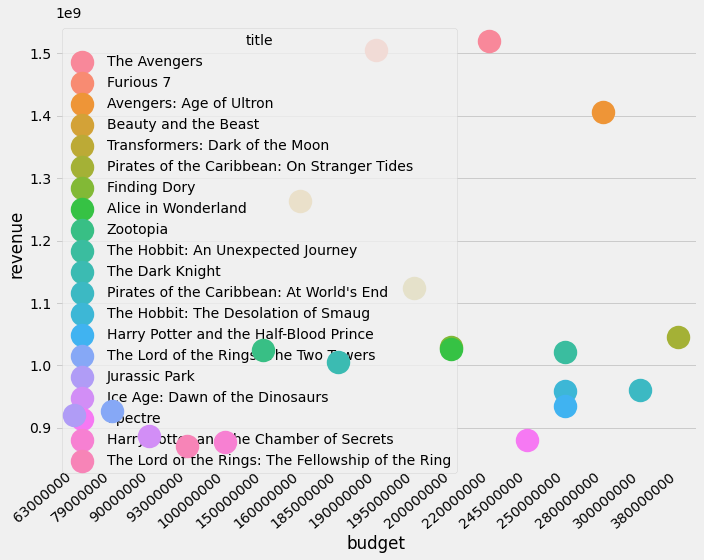

In [609]:
plt.figure(figsize=(10,8))

treino = treino.sort_values(by='revenue', ascending=False)
treino2 = treino.head(20)
ax= sns.pointplot(treino2['budget'], treino2['revenue'], hue= treino2['title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha= "right")
plt.tight_layout()
plt.show()


# Submissão

In [610]:
#https://www.kaggle.com/c/tmdb-box-office-prediction/overview

#Teste

In [611]:
#print('Number of genres in films')
# treino['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

In [612]:
# dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
#                 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

# def text_to_dict(df):
#     for column in dict_columns:
#         df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
#     return df
        
# dfx = text_to_dict(treino)
# for col in dict_columns:
#        treino[col]=dfx[col]

In [613]:
# collections= treino['belongs_to_collection'].apply(lambda x : x[0]['name'] if x!= {} else '?').value_counts()[1:15]
# plt.figure(figsize=(8,8))
# sns.barplot(collections,collections.index)
# plt.show()

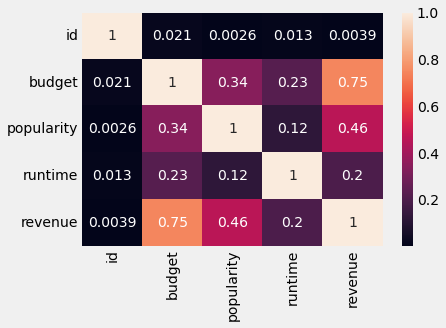

In [614]:
#verificando correlações
corr = treino.corr()
sns.heatmap(corr, annot=True)

# Testando funções

In [615]:
#treino.sort_values(by='budget',ascending=False)

In [616]:
#Retirando linhas com dados faltantes
#linha axis=0 / coluna axis=1
#linha por linha ->
#treino.dropna(axis=0, subset=['genres', 'overview','poster_path','production_countries', 'runtime','spoken_languages', 'cast', 'crew'],inplace = True)

In [617]:
#treino.sort_values(by='popularity',ascending=False)